In [21]:
# Imports
# ---------
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import matplotlib as mpl
from peakutils.plot import plot as pplot
import warnings
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings("ignore")

register_matplotlib_converters()

# File locations
# ----------------
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/gap_filling/536_method/q12021/oct_update/'
data_home = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/0oxaria/gap_filling/jun_to_sept_2021/'


In [22]:
# Load the dfs
# --------------
oxaria_pm = pd.read_feather(
    data_home+'oxaria_pm_stable15_full_corr_oct_2021_final_ts.ftr').set_index(['fname', 'rec'])
oxaria_no2 = pd.read_feather(
    data_home+'oxaria_no2_stable15_full_corr_oct_2021_final_ts.ftr').set_index(['fname', 'rec'])
auto_merged = pd.read_feather(
    data_home+'auto_merged_ratified+2021_oct_update.ftr').set_index('rec')

oxaria_no2.info()
oxaria_pm.info()
auto_merged.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 568438 entries, ('High St', Timestamp('2020-10-14 00:00:00+0000', tz='UTC')) to ('Speedwell St', Timestamp('2021-10-01 00:00:00+0000', tz='UTC'))
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   tag                                 568438 non-null  object 
 1   val.no2.wev                         568438 non-null  float32
 2   val.no2.cnc                         567226 non-null  float32
 3   val.no2.aev                         568438 non-null  float32
 4   val.no2.wec                         567226 non-null  float32
 5   val.sht.hmd_g                       567226 non-null  float32
 6   val.sht.tmp_g                       567226 non-null  float32
 7   val.no2.cnc_1                       556605 non-null  float32
 8   name                                568438 non-null  object 
 9   mag_hmd_s20                         5672

## 15-minute NO2 time series all sensors with good quality data

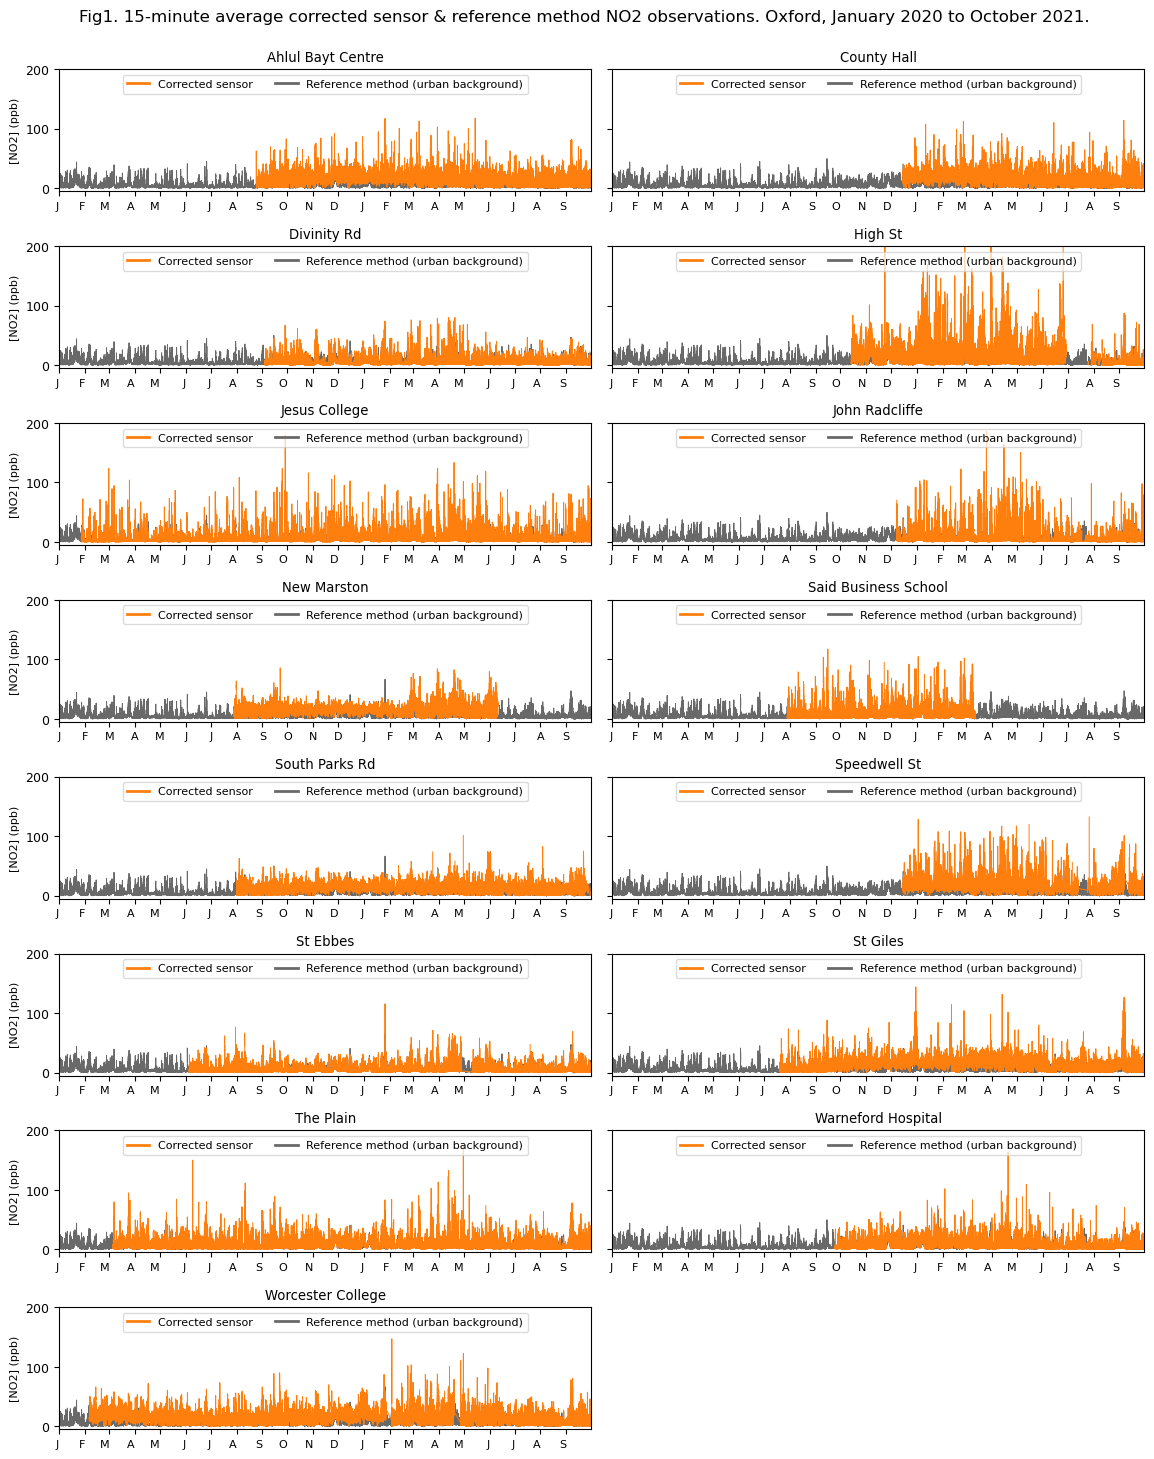

In [23]:
# Plot 15-min no2
# -----------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8, ncols=2, sharex=False,
                         sharey=True, figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle(
    'Fig1. 15-minute average corrected sensor & reference method NO2 observations. Oxford, January 2020 to October 2021.\n', y=0.91)
df = oxaria_no2.copy()
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]
    dat.plot(x='rec', y='val.no2.cnc_1_lgbm_norm_cor_blc', c='tab:orange', lw=0.7, marker='', ms=1, ls='-',
             label='Corrected sensor', ax=ax, legend=True, zorder=2)

    auto_merged.reset_index().query('sitecode_s == "OX8"').plot(x='rec', y='no2_ppb_s', c='dimgrey', lw=0.7, marker='', ms=0.1, ls='-',
                                                                label='Reference method (urban background)', ax=ax, legend=True, zorder=1)
    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-5, 200)
    ax.set_ylabel('[NO2] (ppb)', fontsize=8)
    ax.set_xlabel('')

    plt.subplots_adjust(wspace=0.04, hspace=0.45)

    leg = ax.legend(frameon=True, framealpha=0.7,
                    loc='upper center', ncol=2, fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

fig.delaxes(axes_list.pop(-1))

# plt.savefig(pngs+'oxaria0_pm10_15m_fullycorrected_sensor_ts202021.png')
plt.show()

for ax in axes_list:
    ax.remove()


## 15-minute PM10 time series all sensors with good quality data

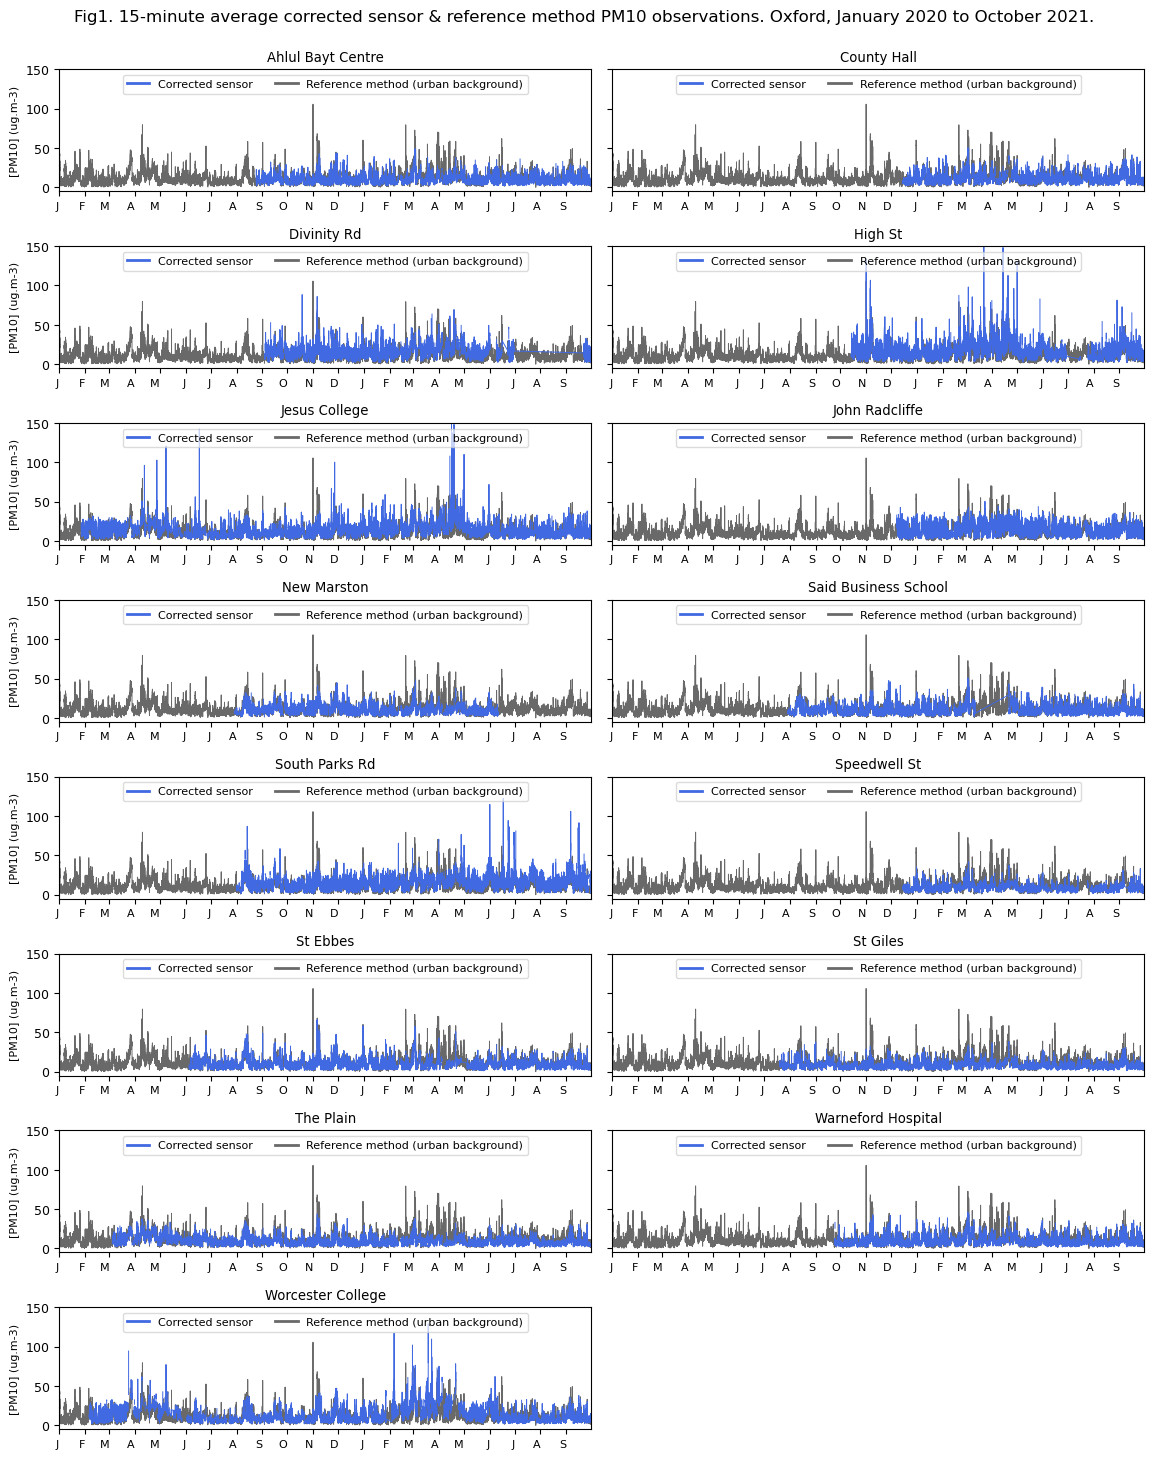

In [24]:
# Plot 15-min pm10
# -----------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8, ncols=2, sharex=False,
                         sharey=True, figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle(
    'Fig1. 15-minute average corrected sensor & reference method PM10 observations. Oxford, January 2020 to October 2021.\n', y=0.91)
df = oxaria_pm.copy()
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]
    dat.plot(x='rec', y='val.pm10_1_c2_SH_xt_cor', c='royalblue', lw=0.7, marker='', ms=1, ls='-',
             label='Corrected sensor', ax=ax, legend=True, zorder=2)

    auto_merged.reset_index().query('sitecode_s == "OX8"').plot(x='rec', y='pm10_ugg_s', c='dimgrey', lw=0.7, marker='', ms=0.1, ls='-',
                                                                label='Reference method (urban background)', ax=ax, legend=True, zorder=1)
    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-5, 150)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')

    plt.subplots_adjust(wspace=0.04, hspace=0.45)

    leg = ax.legend(frameon=True, framealpha=0.7,
                    loc='upper center', ncol=2, fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

fig.delaxes(axes_list.pop(-1))

# plt.savefig(pngs+'oxaria0_pm10_15m_fullycorrected_sensor_ts202021.png')
plt.show()

for ax in axes_list:
    ax.remove()


## 15-minute PM2.5 time series all sensors with good quality data

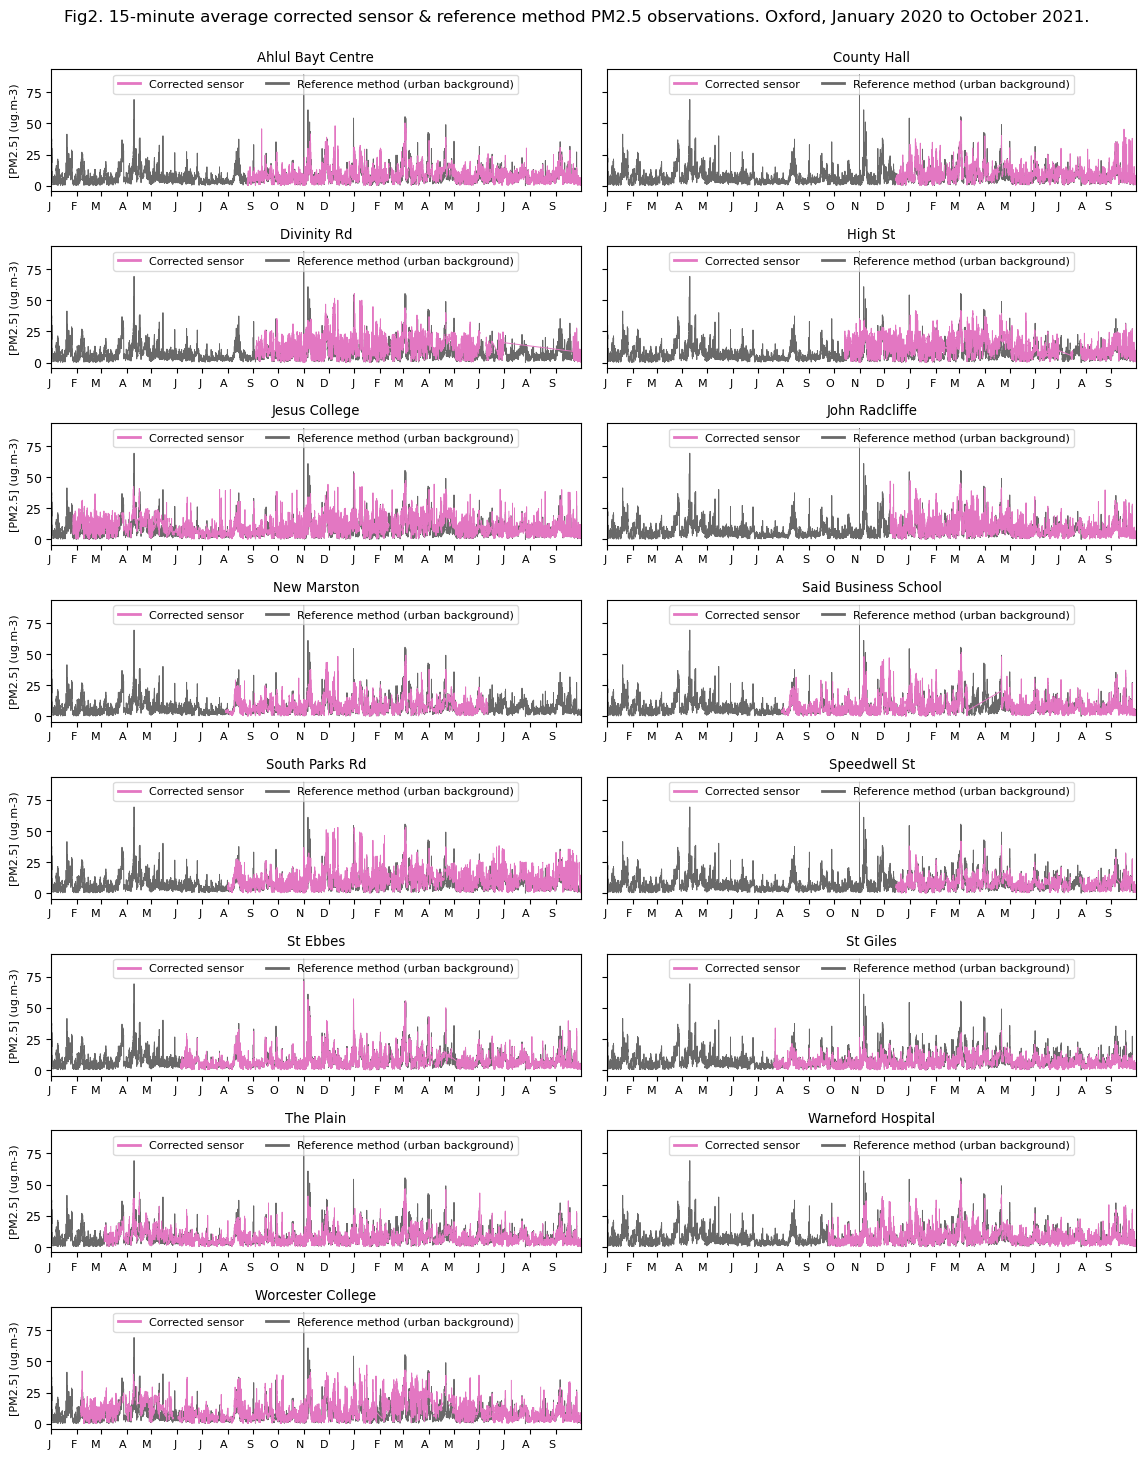

In [6]:
# Plot 15-min pm2.5
# -------------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8, ncols=2, sharex=False,
                         sharey=True, figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle(
    'Fig2. 15-minute average corrected sensor & reference method PM2.5 observations. Oxford, January 2020 to October 2021.\n', y=0.91)
df = oxaria_pm.copy()
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]
    dat.plot(x='rec', y='val.pm2p5_1_c2_S_xt_cor', c='tab:pink', lw=0.7, marker='', ms=1, ls='-',
             label='Corrected sensor', ax=ax, legend=True, zorder=2)
    auto_merged.reset_index().query('sitecode_s == "OX8"').plot(x='rec', y='pm25_ugg_s', c='dimgrey', lw=0.7, marker='', ms=0.1, ls='-',
                                                                label='Reference method (urban background)', ax=ax, legend=True, zorder=1)
    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM2.5] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True, framealpha=0.7,
                    loc='upper center', ncol=2, fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

fig.delaxes(axes_list.pop(-1))

plt.savefig(pngs+'oxaria0_pm25_15m_fullycorrected_sensor_ts2020.png')
plt.show()

for ax in axes_list:
    ax.remove()


## Hourly NO2 time series all sensors with good quality data

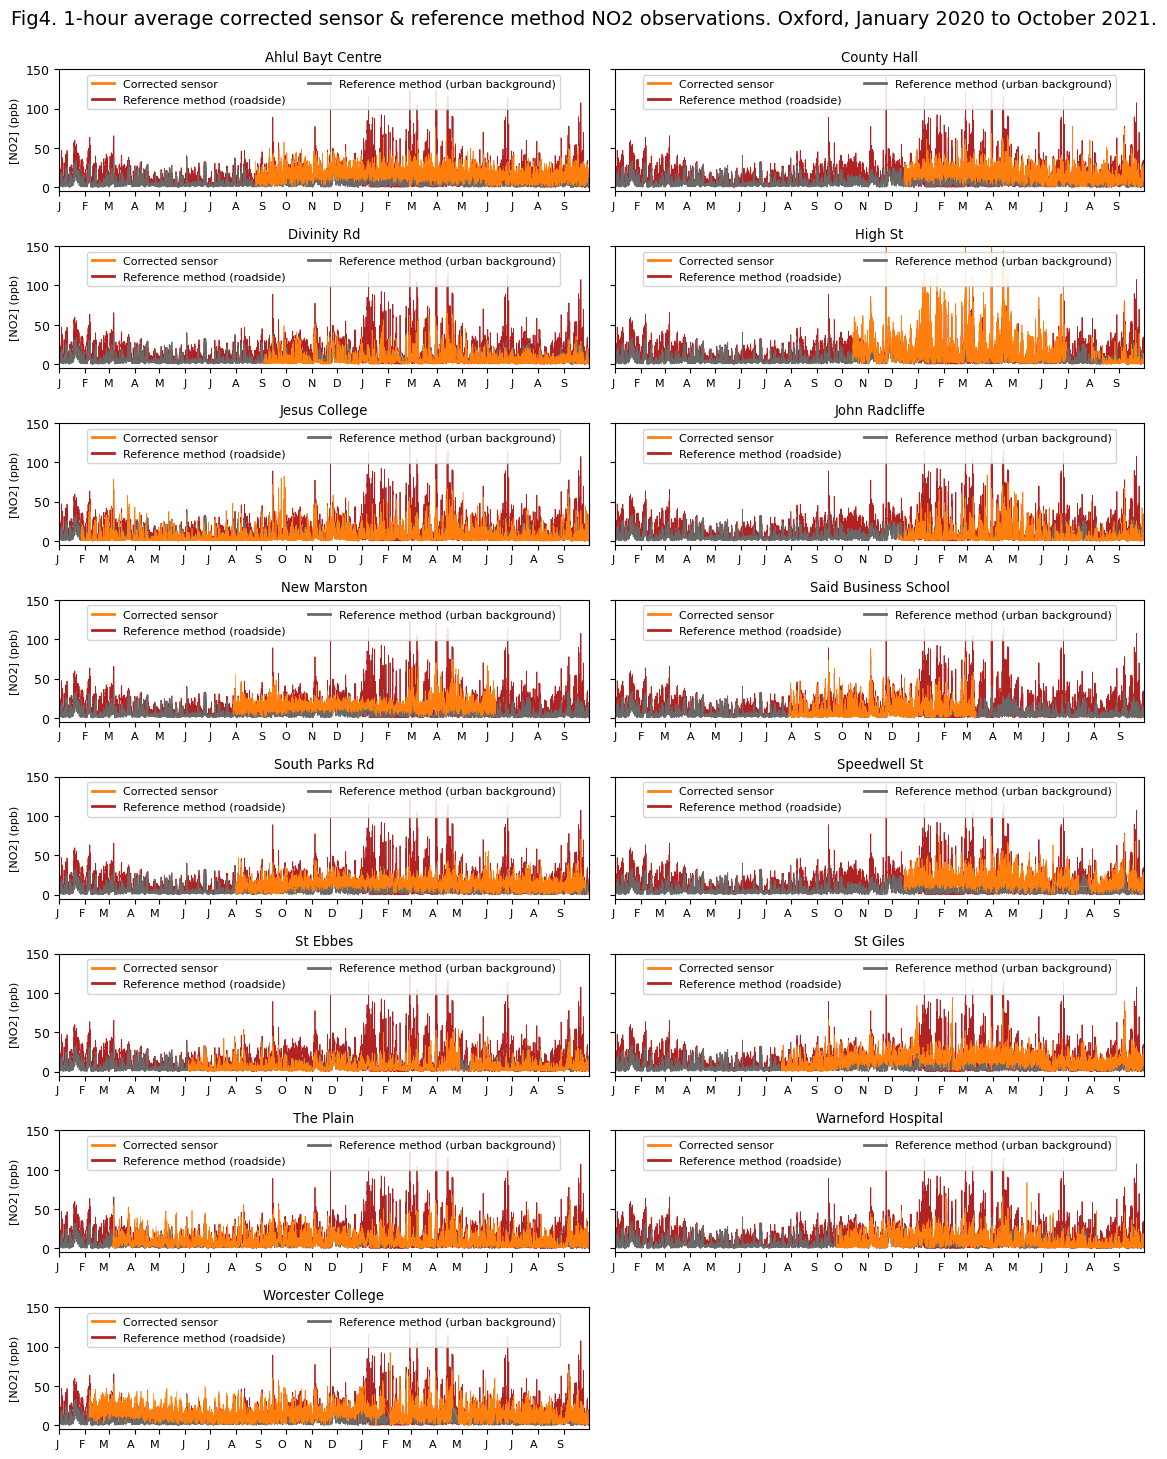

In [25]:
# Plot 1-hour NO2
# -----------------
no21hr = oxaria_no2.groupby([
    pd.Grouper(level='fname'),
    pd.Grouper(level='rec', freq='H')
]).mean().reset_index('fname')

highst1hr = auto_merged.reset_index().query('sitecode_h == "OX6"').set_index('rec').groupby(
    [pd.Grouper(level='rec', freq='H')]).mean().reset_index()

sebbes1hr = auto_merged.reset_index().query('sitecode_s == "OX8"').set_index('rec').groupby(
    [pd.Grouper(level='rec', freq='H')]).mean().reset_index()

x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle(
    'Fig4. 1-hour average corrected sensor & reference method NO2 observations. Oxford, January 2020 to October 2021.\n',
    fontsize=14,
    y=0.91)

for idx, dat in no21hr.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]
    dat.plot(x='rec',
             y='val.no2.cnc_1_lgbm_norm_cor_blc',
             c='tab:orange',
             lw=0.5,
             marker='',
             ms=1,
             ls='-',
             label='Corrected sensor',
             ax=ax,
             legend=True,
             zorder=2)
    highst1hr.plot(x='rec',
                   y='no2_ppb_h',
                   c='firebrick',
                   lw=0.6,
                   marker='',
                   ms=0.1,
                   ls='-',
                   label='Reference method (roadside)',
                   ax=ax,
                   legend=True,
                   zorder=1)
    sebbes1hr.plot(x='rec',
                   y='no2_ppb_s',
                   c='dimgrey',
                   lw=0.7,
                   marker='',
                   ms=0.1,
                   ls='-',
                   label='Reference method (urban background)',
                   ax=ax,
                   legend=True,
                   zorder=1)
    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-5, 150)
    ax.set_ylabel('[NO2] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.85,
                    loc='upper center',
                    ncol=2,
                    fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

fig.delaxes(axes_list.pop(-1))

#plt.savefig(pngs+'oxaria0_pm10_1hr_fullycorrected_sensor_ts2020.png')
plt.show()

for ax in axes_list:
    ax.remove()


## Hourly PM10 time series all sensors with good quality data

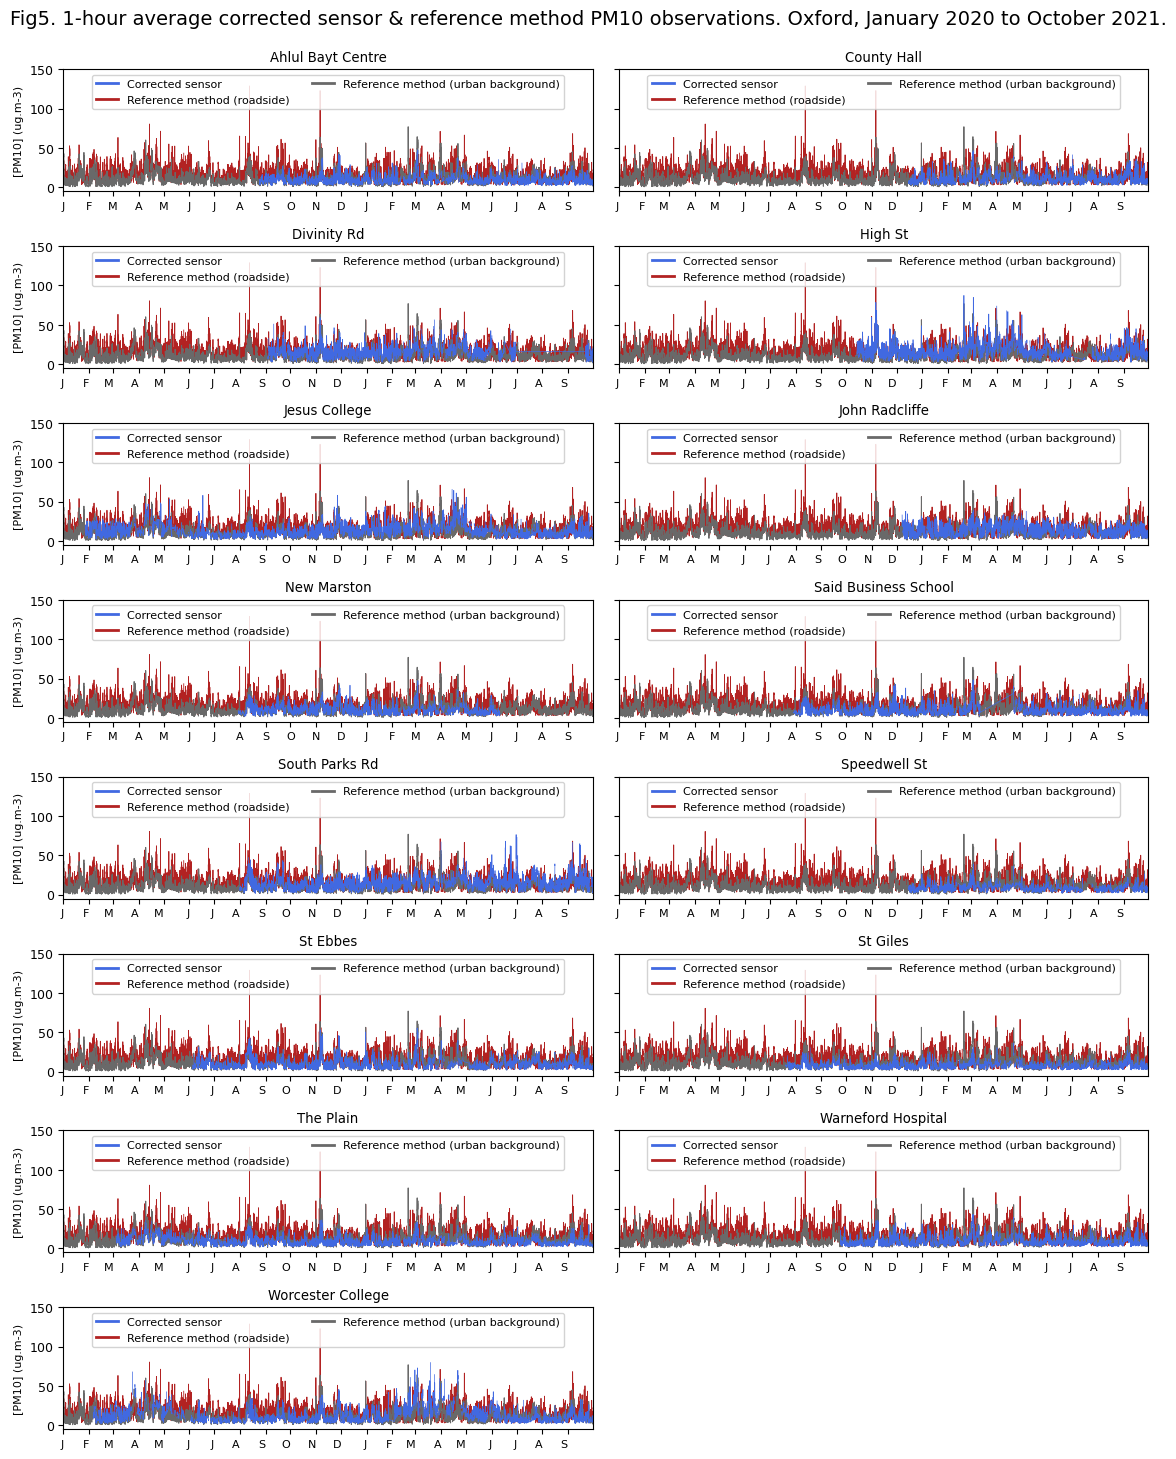

In [26]:
# Plot 1-hour pm10
# -----------------
pm1hr = oxaria_pm.groupby([
    pd.Grouper(level='fname'),
    pd.Grouper(level='rec', freq='H')
]).mean().reset_index('fname')

highst1hr = auto_merged.reset_index().query('sitecode_h == "OX6"').set_index('rec').groupby(
    [pd.Grouper(level='rec', freq='H')]).mean().reset_index()

sebbes1hr = auto_merged.reset_index().query('sitecode_s == "OX8"').set_index('rec').groupby(
    [pd.Grouper(level='rec', freq='H')]).mean().reset_index()

x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle(
    'Fig5. 1-hour average corrected sensor & reference method PM10 observations. Oxford, January 2020 to October 2021.\n',
    fontsize=14,
    y=0.91)

for idx, dat in pm1hr.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]
    dat.plot(x='rec',
             y='val.pm10_1_c2_SH_xt_cor',
             c='royalblue',
             lw=0.5,
             marker='',
             ms=1,
             ls='-',
             label='Corrected sensor',
             ax=ax,
             legend=True,
             zorder=2)
    highst1hr.plot(x='rec',
                   y='pm10_ugg_h',
                   c='firebrick',
                   lw=0.6,
                   marker='',
                   ms=0.1,
                   ls='-',
                   label='Reference method (roadside)',
                   ax=ax,
                   legend=True,
                   zorder=1)
    sebbes1hr.plot(x='rec',
                   y='pm10_ugg_s',
                   c='dimgrey',
                   lw=0.7,
                   marker='',
                   ms=0.1,
                   ls='-',
                   label='Reference method (urban background)',
                   ax=ax,
                   legend=True,
                   zorder=1)
    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-5, 150)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.85,
                    loc='upper center',
                    ncol=2,
                    fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

fig.delaxes(axes_list.pop(-1))

plt.savefig(pngs+'oxaria0_pm10_1hr_fullycorrected_sensor_ts2020.png')
plt.show()

for ax in axes_list:
    ax.remove()


## Hourly PM2.5 time series all sensors with good quality data

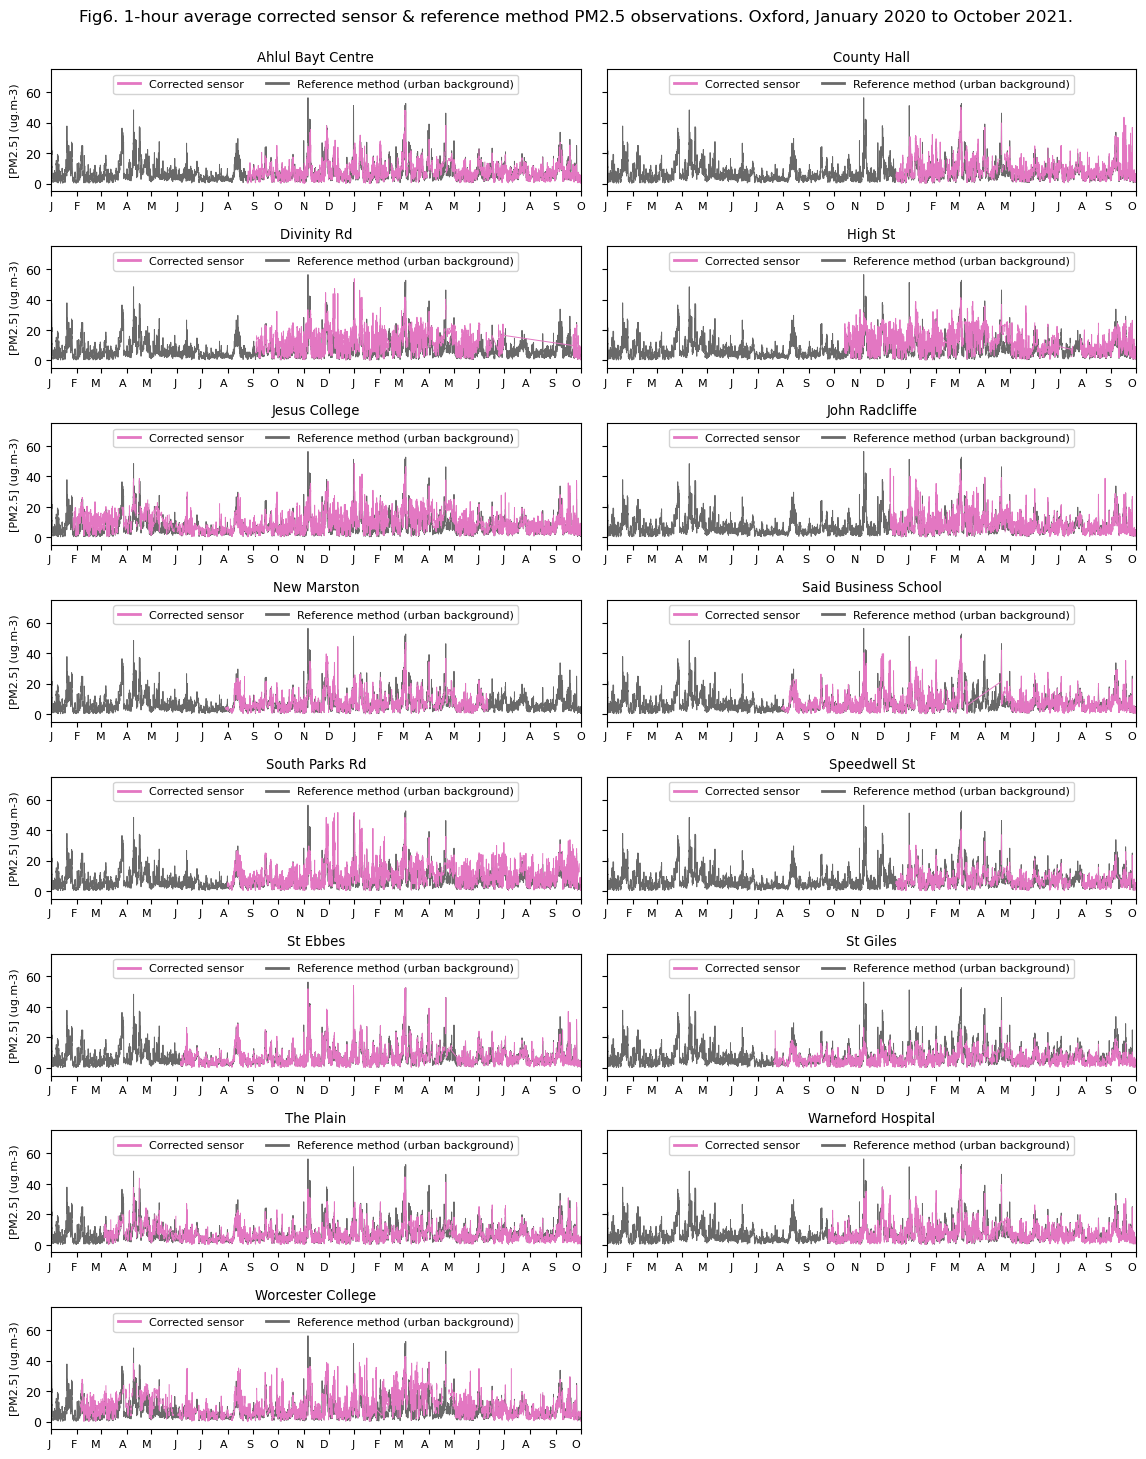

In [27]:
# Plot 1-hour sensor no2
# -----------------------
x_ticks = pd.date_range('2020-01-01', periods=22, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S', 'O'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Fig6. 1-hour average corrected sensor & reference method PM2.5 observations. Oxford, January 2020 to October 2021.\n', y=0.91)


for idx, dat in pm1hr.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]
    dat.plot(x='rec',
             y='val.pm2p5_1_c2_S_xt_cor',
             c='tab:pink',
             lw=0.7,
             marker='',
             ms=1,
             ls='-',
             label='Corrected sensor',
             ax=ax,
             legend=True,
             zorder=2)
    sebbes1hr.plot(
        x='rec',
        y='pm25_ugg_s',
        c='dimgrey',
        lw=0.7,
        marker='',
        ms=0.1,
        ls='-',
        label='Reference method (urban background)',
        ax=ax,
        legend=True,
        zorder=1)

    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-5, 75)
    ax.set_ylabel('[PM2.5] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.85,
                    loc='upper center',
                    ncol=2,
                    fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

fig.delaxes(axes_list.pop(-1))

plt.savefig(pngs+'oxaria0_pm25_1hr_fullycorrected_sensor_ts2020.png')
plt.show()

for ax in axes_list:
    ax.remove()


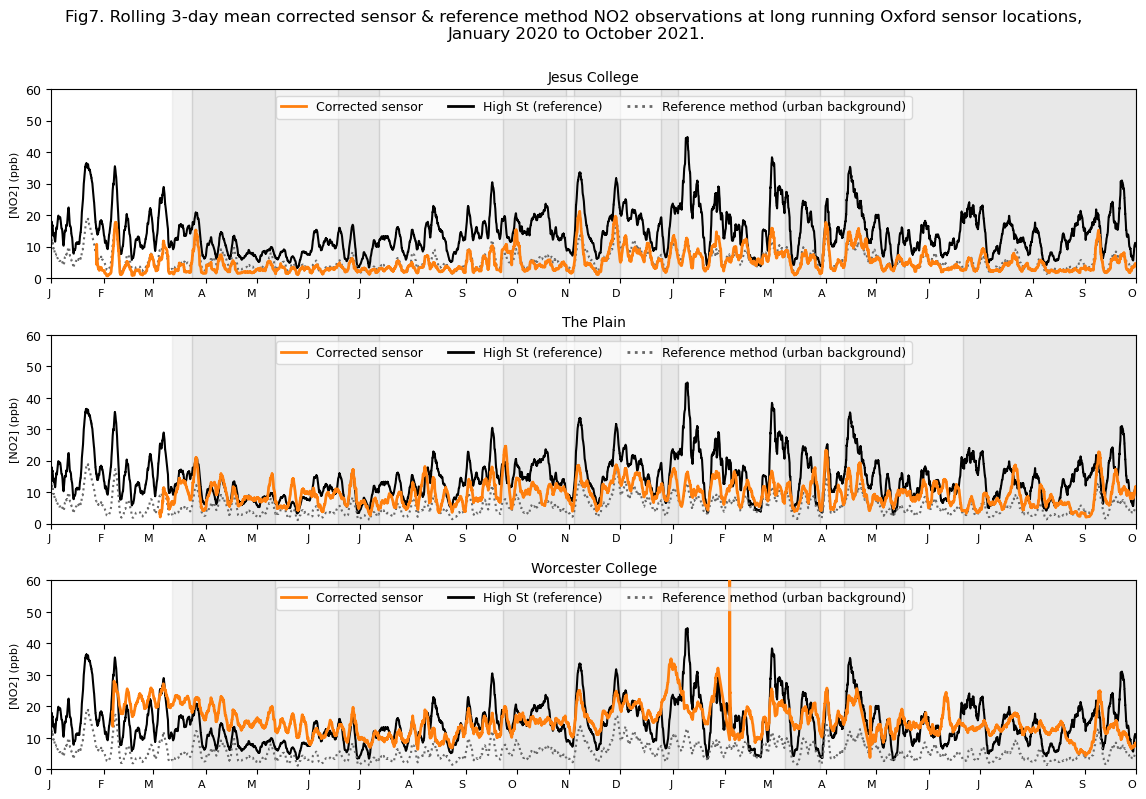

In [37]:
# Plot rolling 3-day mean corrected sensor & reference method NO2 
# -----------------------------------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=22, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S', 'O'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 10))
axes_list = [item for item in axes]


fig.suptitle('Fig7. Rolling 3-day mean corrected sensor & reference method NO2 observations at long running Oxford sensor locations, \nJanuary 2020 to October 2021.\n', y=0.96)

df = oxaria_no2.query(
    'fname in ["Jesus College", "The Plain", "Worcester College"]')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                        y='val.no2.cnc_1_lgbm_norm_cor_blc',
                                                                        c='tab:orange',
                                                                        marker='',
                                                                        ms=1.5,
                                                                        ls='-',
                                                                        lw=2,
                                                                        label='Corrected sensor',
                                                                        ax=ax,
                                                                        legend=True,
                                                                        zorder=3)

    auto_merged.reset_index().query('sitecode_h == "OX6"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='no2_ppb_h',
                                    c='k',
                                    lw=1.5,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='High St (reference)',
                                    ax=ax,
                                    legend=True,
                                    zorder=1)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                     y='no2_ppb_s',
                                     c='dimgrey',
                                     lw=1.5,
                                     marker='',
                                     ms=1,
                                     ls=':',
                                     label='Reference method (urban background)',
                                     ax=ax,
                                     legend=True,
                                     zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=10)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 60)
    ax.set_ylabel('[NO2] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.3)

    leg = ax.legend(frameon=True,
                    framealpha=0.7,
                    loc='upper center',
                    ncol=3,
                    fontsize=9)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

# plt.savefig(
#     pngs + 'oxaria0_pm10_3day_fullycorrected_sensor_longrunning_oct_update.png')

for ax in axes_list:
    ax.remove()

plt.show()


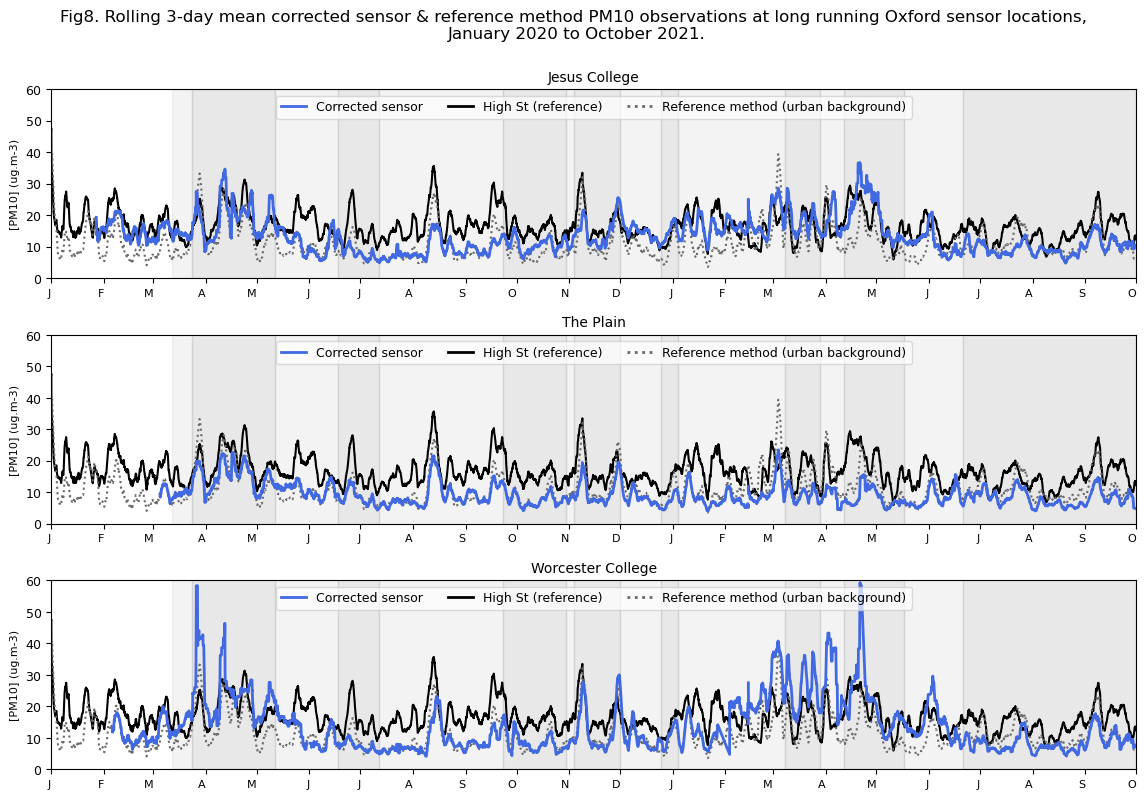

In [40]:
# Plot rolling 3-day mean corrected sensor & reference method PM10 
# -----------------------------------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=22, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S', 'O'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 10))
axes_list = [item for item in axes]


fig.suptitle('Fig8. Rolling 3-day mean corrected sensor & reference method PM10 observations at long running Oxford sensor locations, \nJanuary 2020 to October 2021.\n', y=0.96)

df = oxaria_pm.query(
    'fname in ["Jesus College", "The Plain", "Worcester College"]')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                        y='val.pm10_1_c2_SH_xt_cor',
                                                                        c='royalblue',
                                                                        marker='',
                                                                        ms=2,
                                                                        ls='-',
                                                                        lw=2,
                                                                        label='Corrected sensor',
                                                                        ax=ax,
                                                                        legend=True,
                                                                        zorder=3)

    auto_merged.reset_index().query('sitecode_h == "OX6"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='pm10_ugg_h',
                                    c='k',
                                    lw=1.5,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='High St (reference)',
                                    ax=ax,
                                    legend=True,
                                    zorder=1)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                     y='pm10_ugg_s',
                                     c='dimgrey',
                                     lw=1.5,
                                     marker='',
                                     ms=1,
                                     ls=':',
                                     label='Reference method (urban background)',
                                     ax=ax,
                                     legend=True,
                                     zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=10)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 60)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.3)

    leg = ax.legend(frameon=True,
                    framealpha=0.7,
                    loc='upper center',
                    ncol=3,
                    fontsize=9)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

# plt.savefig(
#     pngs + 'oxaria0_pm10_3day_fullycorrected_sensor_longrunning_oct_update.png')

for ax in axes_list:
    ax.remove()

plt.show()


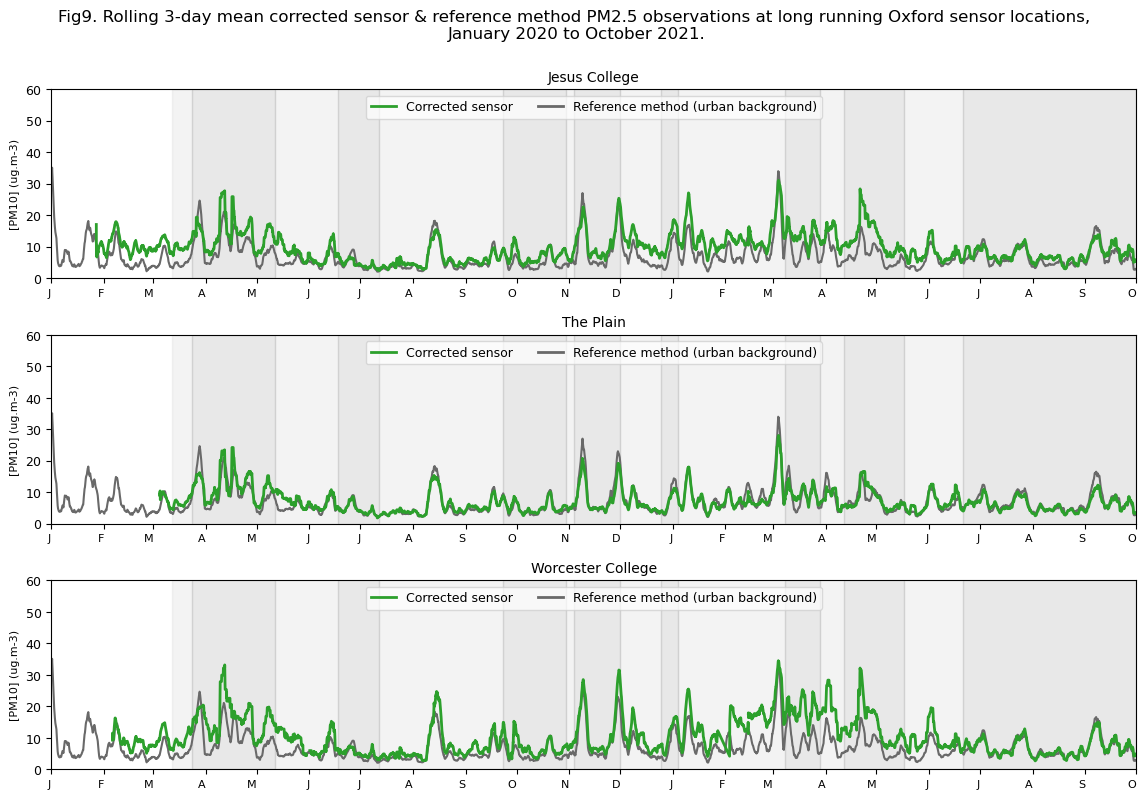

In [41]:
# Plot rolling 3-day mean corrected sensor & reference method PM10 
# -----------------------------------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=22, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S', 'O'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 10))
axes_list = [item for item in axes]


fig.suptitle('Fig9. Rolling 3-day mean corrected sensor & reference method PM2.5 observations at long running Oxford sensor locations, \nJanuary 2020 to October 2021.\n', y=0.96)

df = oxaria_pm.query(
    'fname in ["Jesus College", "The Plain", "Worcester College"]')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                        y='val.pm2p5_1_c2_S_xt_cor',
                                                                        c='tab:green',
                                                                        marker='',
                                                                        ms=2,
                                                                        ls='-',
                                                                        lw=2,
                                                                        label='Corrected sensor',
                                                                        ax=ax,
                                                                        legend=True,
                                                                        zorder=3)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                     y='pm25_ugg_s',
                                     c='dimgrey',
                                     lw=1.5,
                                     marker='',
                                     ms=1,
                                     ls='-',
                                     label='Reference method (urban background)',
                                     ax=ax,
                                     legend=True,
                                     zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=10)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 60)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.3)

    leg = ax.legend(frameon=True,
                    framealpha=0.7,
                    loc='upper center',
                    ncol=3,
                    fontsize=9)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

# plt.savefig(
#     pngs + 'oxaria0_pm10_3day_fullycorrected_sensor_longrunning_oct_update.png')

for ax in axes_list:
    ax.remove()

plt.show()


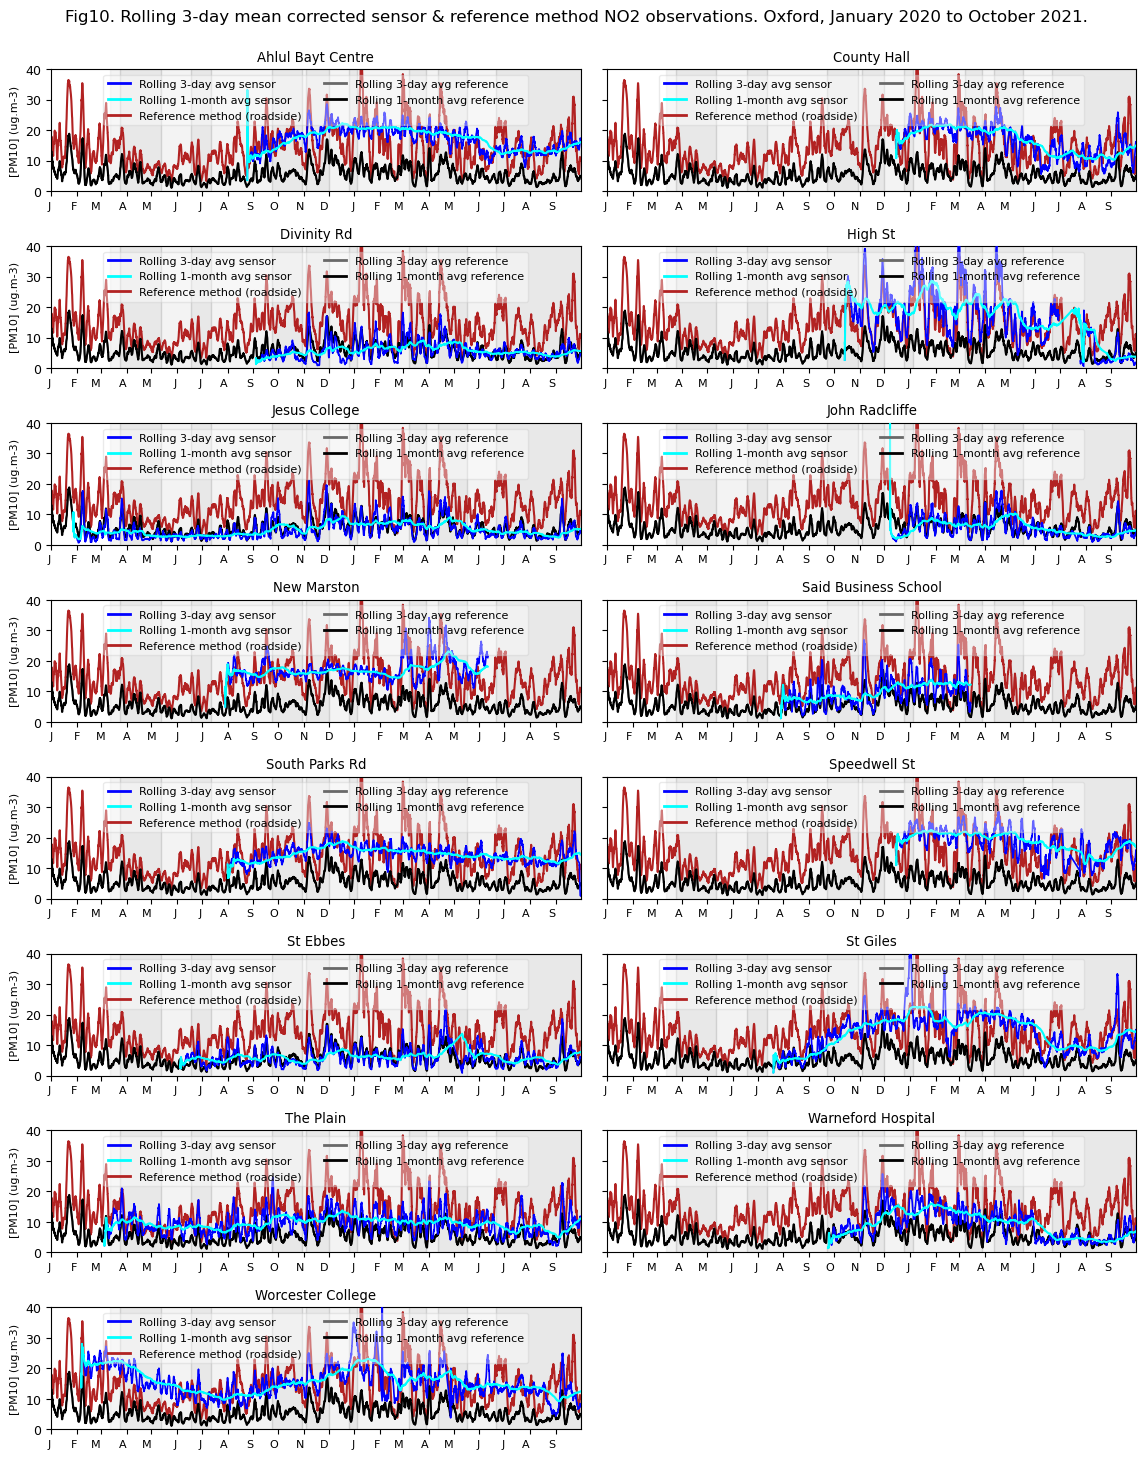

In [46]:
# Plot 15-minute snsor no2 & its baseline
# -----------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]


fig.suptitle('Fig10. Rolling 3-day mean corrected sensor & reference method NO2 observations. Oxford, January 2020 to October 2021.\n', y=0.91)

df = oxaria_no2.query('tag != "scs-bgx-558"')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                       y='val.no2.cnc_1_lgbm_norm_cor_blc',
                                                                       c='blue',
                                                                       marker='',
                                                                       ms=1,
                                                                       ls='-',
                                                                       lw=1.2,
                                                                       label='Rolling 3-day avg sensor',
                                                                       ax=ax,
                                                                       legend=True,
                                                                       zorder=3)

    dat.sort_index().reset_index().rolling('28D', on='rec').mean().plot(x='rec',
                                                                        y='val.no2.cnc_1_lgbm_norm_cor_blc',
                                                                        c='cyan',
                                                                        marker='',
                                                                        ms=1,
                                                                        ls='-',
                                                                        lw=1.5,
                                                                        label='Rolling 1-month avg sensor',
                                                                        ax=ax,
                                                                        legend=True,
                                                                        zorder=4)

    auto_merged.reset_index().query('sitecode_h == "OX6"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='no2_ppb_h',
                                    c='firebrick',
                                    lw=1.5,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='Reference method (roadside)',
                                    ax=ax,
                                    legend=True,
                                    zorder=1)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='no2_ppb_s',
                                    c='dimgrey',
                                    lw=1.2,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='Rolling 3-day avg reference',
                                    ax=ax,
                                    legend=True,
                                    zorder=2)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                     y='no2_ppb_s',
                                     c='k',
                                     lw=1.5,
                                     marker='',
                                     ms=1,
                                     ls='-',
                                     label='Rolling 1-month avg reference',
                                     ax=ax,
                                     legend=True,
                                     zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 40)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.4,
                    loc='upper center',
                    ncol=2,
                    fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

#plt.savefig(pngs + '3day_rolling_mean_pm10_oct_update_lddates.png')

for ax in axes_list:
    ax.remove()

plt.show()


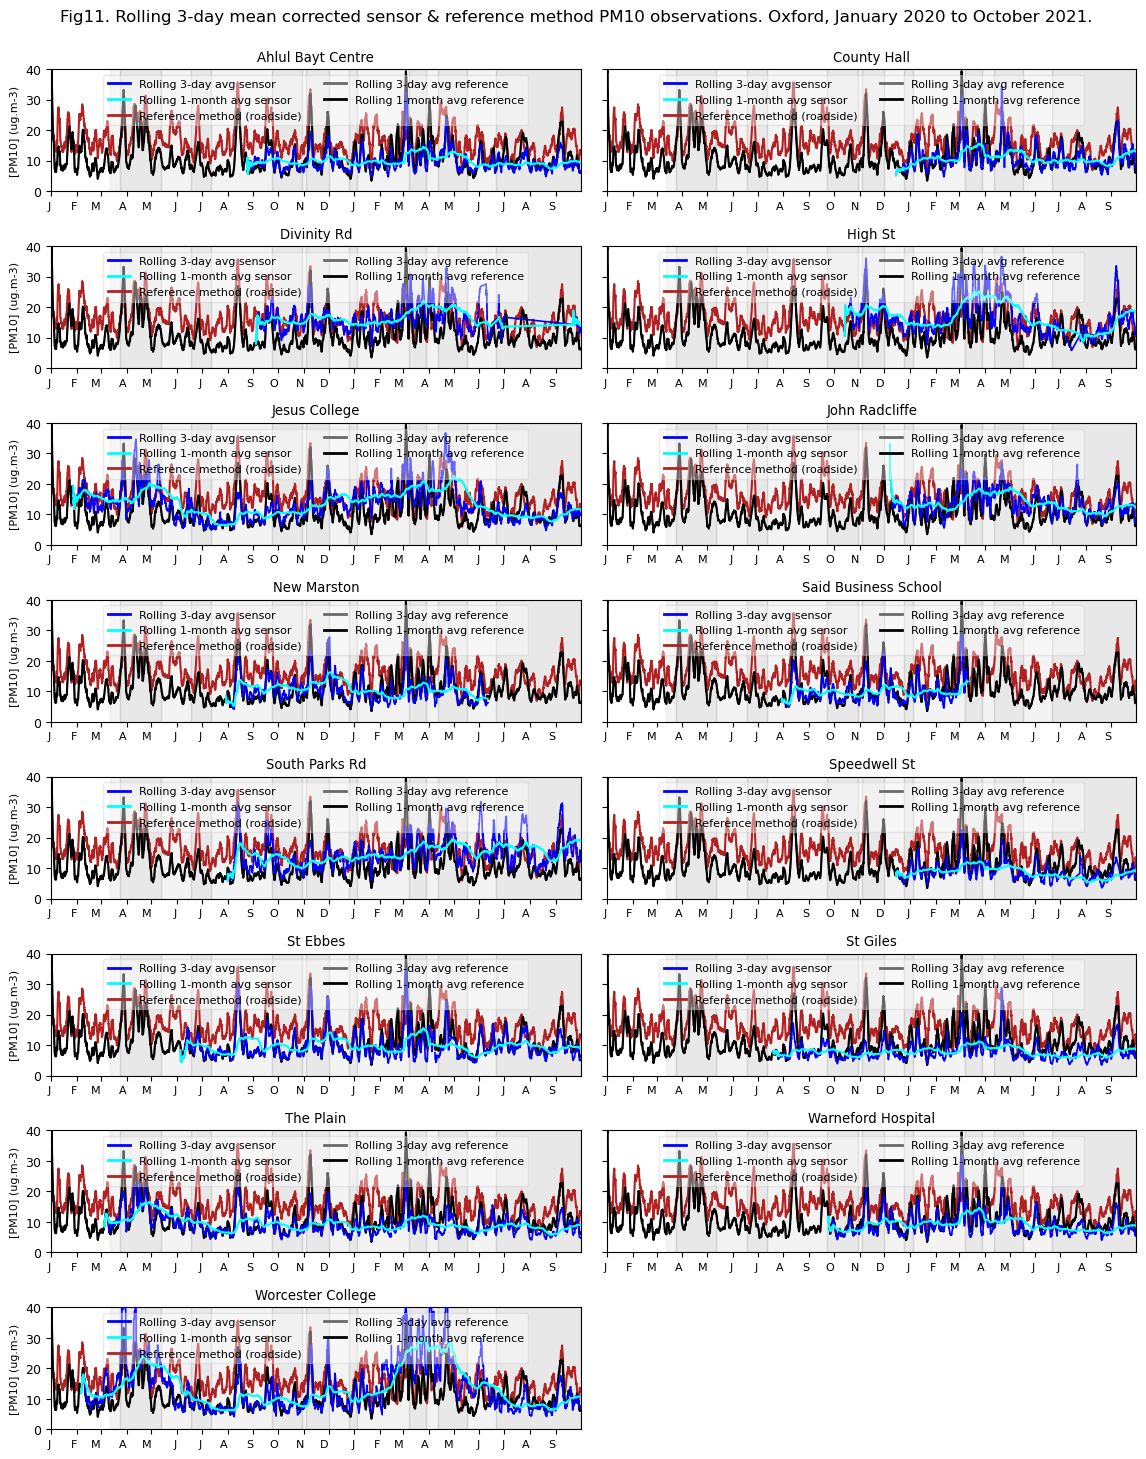

In [45]:
# Plot 15-minute snsor no2 & its baseline
# -----------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]


fig.suptitle('Fig11. Rolling 3-day mean corrected sensor & reference method PM10 observations. Oxford, January 2020 to October 2021.\n', y=0.91)

df = oxaria_pm.query('tag != "scs-bgx-558"')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                       y='val.pm10_1_c2_SH_xt_cor',
                                                                       c='blue',
                                                                       marker='',
                                                                       ms=1,
                                                                       ls='-',
                                                                       lw=1.2,
                                                                       label='Rolling 3-day avg sensor',
                                                                       ax=ax,
                                                                       legend=True,
                                                                       zorder=3)

    dat.sort_index().reset_index().rolling('28D', on='rec').mean().plot(x='rec',
                                                                        y='val.pm10_1_c2_SH_xt_cor',
                                                                        c='cyan',
                                                                        marker='',
                                                                        ms=1,
                                                                        ls='-',
                                                                        lw=1.5,
                                                                        label='Rolling 1-month avg sensor',
                                                                        ax=ax,
                                                                        legend=True,
                                                                        zorder=4)

    auto_merged.reset_index().query('sitecode_h == "OX6"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='pm10_ugg_h',
                                    c='firebrick',
                                    lw=1.5,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='Reference method (roadside)',
                                    ax=ax,
                                    legend=True,
                                    zorder=1)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='pm10_ugg_s',
                                    c='dimgrey',
                                    lw=1.2,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='Rolling 3-day avg reference',
                                    ax=ax,
                                    legend=True,
                                    zorder=2)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                     y='pm10_ugg_s',
                                     c='k',
                                     lw=1.5,
                                     marker='',
                                     ms=1,
                                     ls='-',
                                     label='Rolling 1-month avg reference',
                                     ax=ax,
                                     legend=True,
                                     zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 40)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.4,
                    loc='upper center',
                    ncol=2,
                    fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

#plt.savefig(pngs + '3day_rolling_mean_pm10_oct_update_lddates.png')

for ax in axes_list:
    ax.remove()

plt.show()


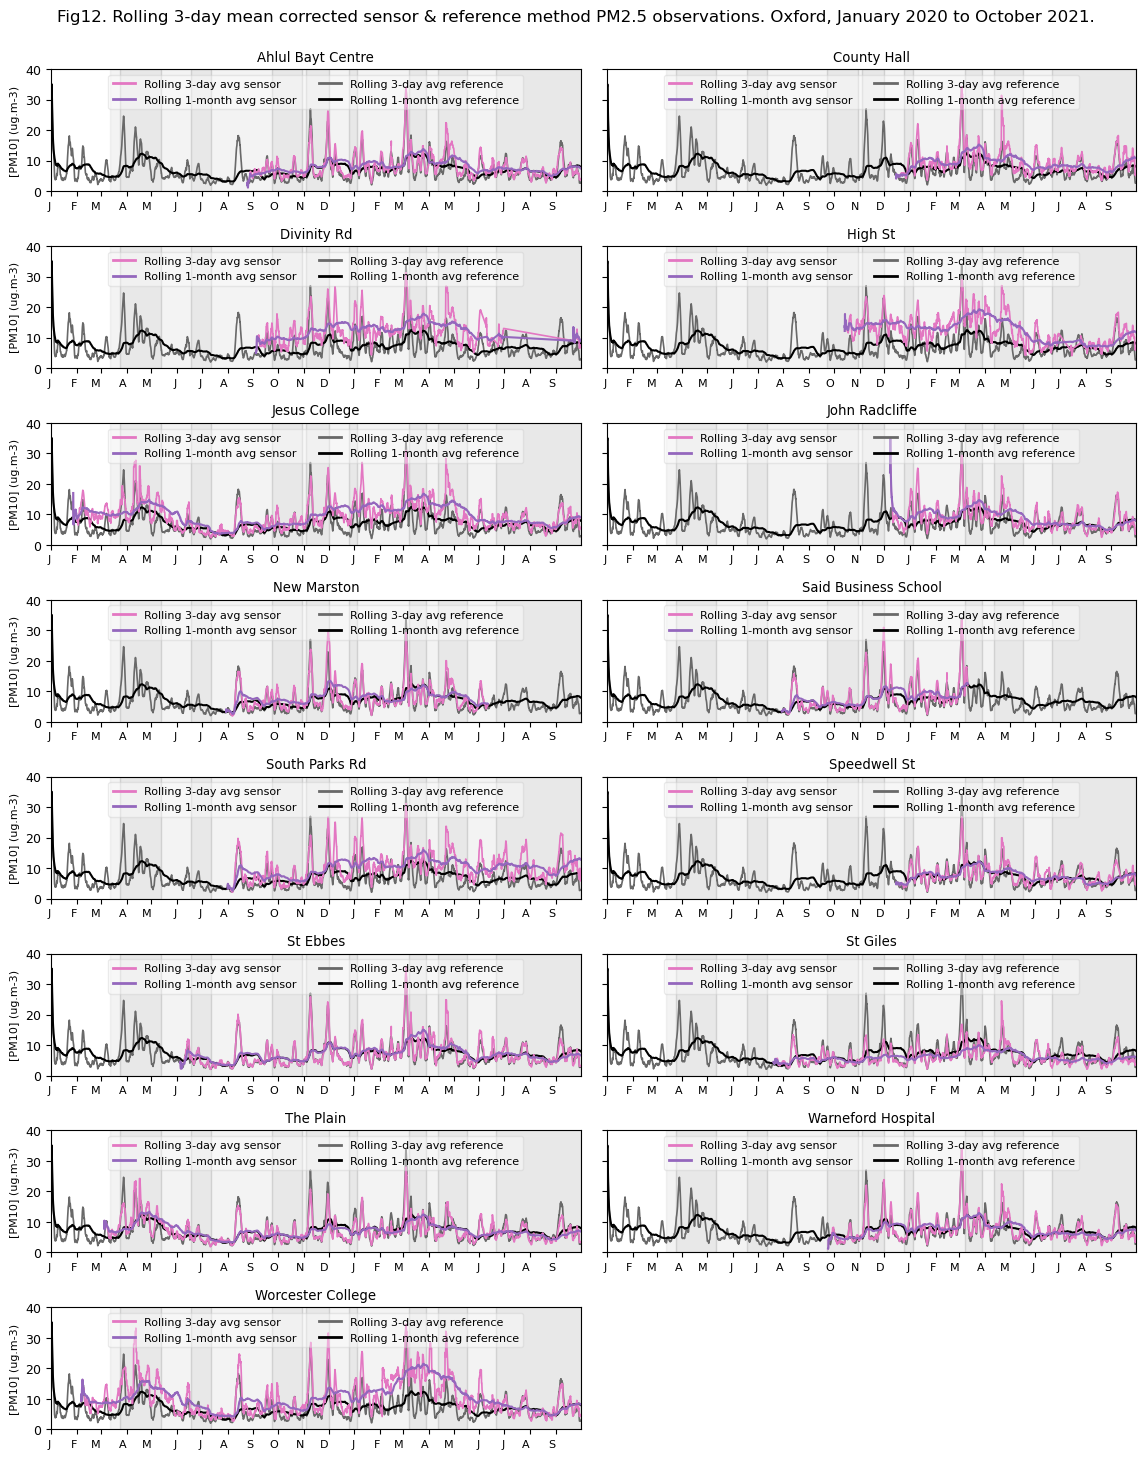

In [50]:
# Plot 15-minute snsor no2 & its baseline
# -----------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]


fig.suptitle('Fig12. Rolling 3-day mean corrected sensor & reference method PM2.5 observations. Oxford, January 2020 to October 2021.\n', y=0.91)

df = oxaria_pm.query('tag != "scs-bgx-558"')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                       y='val.pm2p5_1_c2_S_xt_cor',
                                                                       c='tab:pink',
                                                                       marker='',
                                                                       ms=1,
                                                                       ls='-',
                                                                       lw=1.2,
                                                                       label='Rolling 3-day avg sensor',
                                                                       ax=ax,
                                                                       legend=True,
                                                                       zorder=3)

    dat.sort_index().reset_index().rolling('28D', on='rec').mean().plot(x='rec',
                                                                        y='val.pm2p5_1_c2_S_xt_cor',
                                                                        c='tab:purple',
                                                                        marker='',
                                                                        ms=1,
                                                                        ls='-',
                                                                        lw=1.5,
                                                                        label='Rolling 1-month avg sensor',
                                                                        ax=ax,
                                                                        legend=True,
                                                                        zorder=4)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='pm25_ugg_s',
                                    c='dimgrey',
                                    lw=1.2,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='Rolling 3-day avg reference',
                                    ax=ax,
                                    legend=True,
                                    zorder=2)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '28D', on='rec').mean().plot(x='rec',
                                     y='pm25_ugg_s',
                                     c='k',
                                     lw=1.5,
                                     marker='',
                                     ms=1,
                                     ls='-',
                                     label='Rolling 1-month avg reference',
                                     ax=ax,
                                     legend=True,
                                     zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 40)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.4,
                    loc='upper center',
                    ncol=2,
                    fontsize=8)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

#plt.savefig(pngs + '3day_rolling_mean_pm10_oct_update_lddates.png')

for ax in axes_list:
    ax.remove()

plt.show()


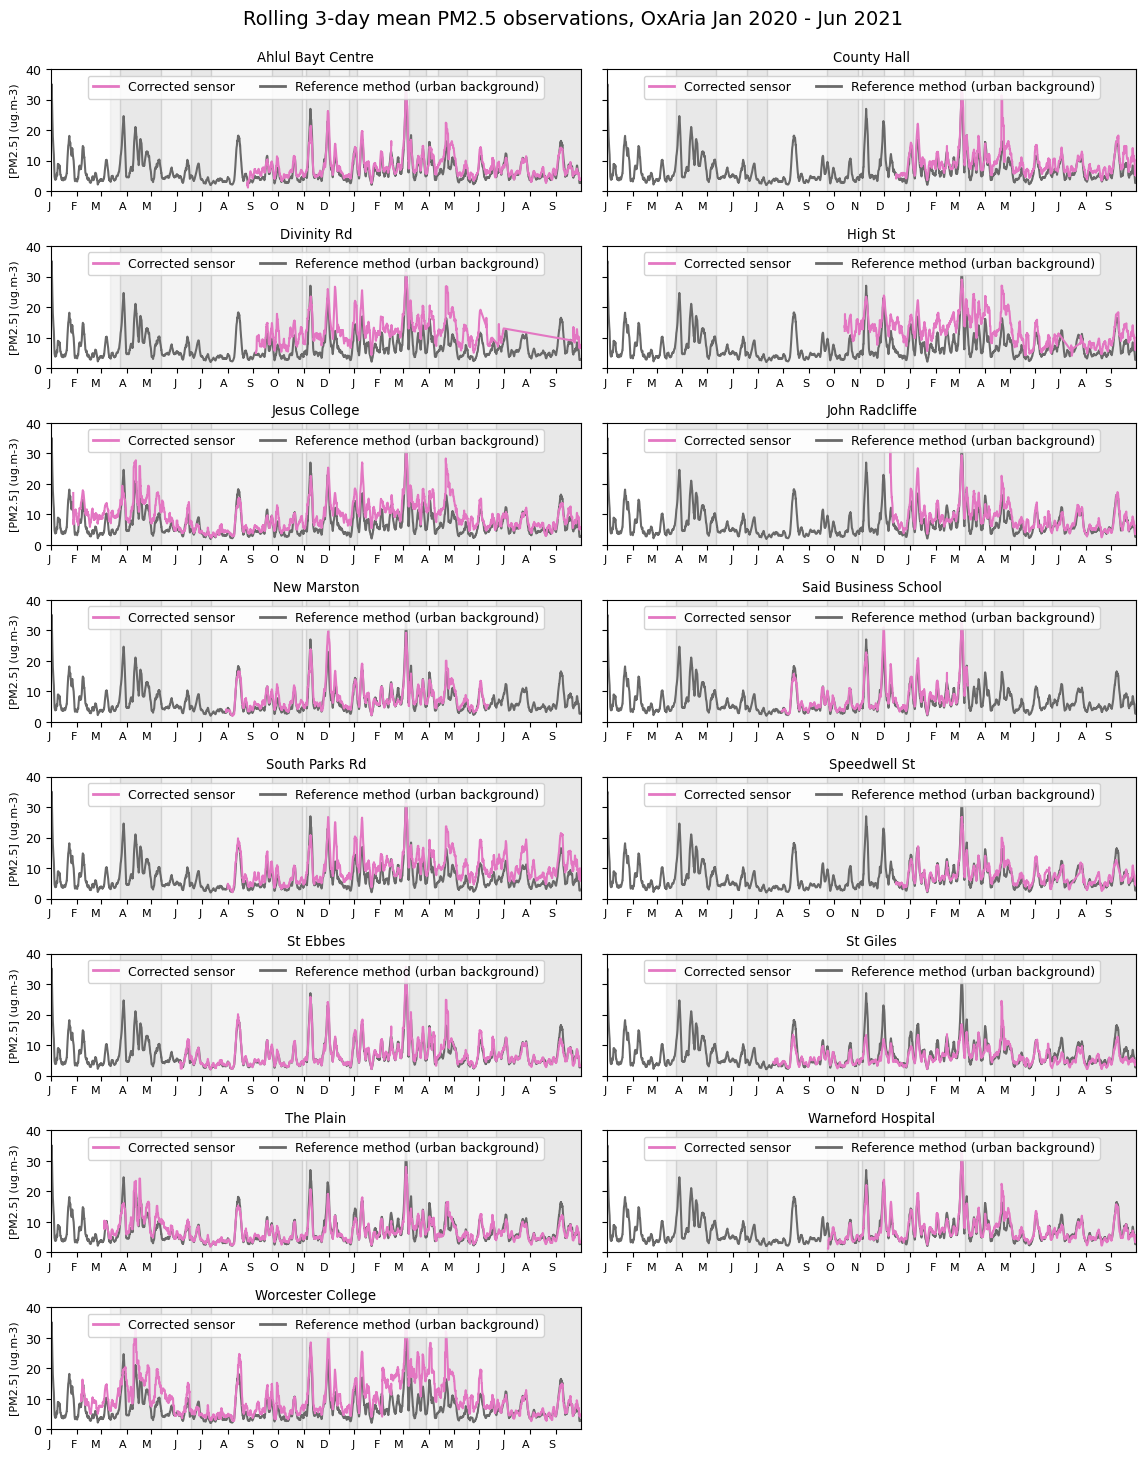

In [20]:
# Plot 15-minute snsor no2 & its baseline
# -----------------------------------------
x_ticks = pd.date_range('2020-01-01', periods=21, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'A', 'S'
]

plt.style.use('default')
myFmt = mdates.DateFormatter('%d-%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 10, 1)

fig, axes = plt.subplots(nrows=8,
                         ncols=2,
                         sharex=False,
                         sharey=True,
                         figsize=(14, 20))
axes_list = [item for sublist in axes for item in sublist]


fig.suptitle('Rolling 3-day mean PM2.5 observations, OxAria Jan 2020 - Jun 2021 \n',
             fontsize=14,
             y=0.91)
df = oxaria_pm.query('tag != "scs-bgx-558"')
for idx, dat in df.groupby('fname'):
    ax = axes_list.pop(0)
    dat.reset_index(inplace=True)
    t_name = dat['fname'].unique()[0]

    dat.sort_index().reset_index().rolling('3D', on='rec').mean().plot(x='rec',
                                                                       y='val.pm2p5_1_c2_S_xt_cor',
                                                                       c='tab:pink',
                                                                       marker='',
                                                                       ms=2,
                                                                       ls='-',
                                                                       lw=1.5,
                                                                       label='Corrected sensor',
                                                                       ax=ax,
                                                                       legend=True,
                                                                       zorder=3)

    auto_merged.reset_index().query('sitecode_s == "OX8"').rolling(
        '3D', on='rec').mean().plot(x='rec',
                                    y='pm25_ugg_s',
                                    c='dimgrey',
                                    lw=1.5,
                                    marker='',
                                    ms=1,
                                    ls='-',
                                    label='Reference method (urban background)',
                                    ax=ax,
                                    legend=True,
                                    zorder=2)

    ax.axvspan(dt.datetime(2020, 3, 12), dt.datetime(
        2020, 3, 24), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 3, 24), dt.datetime(
        2020, 5, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 5, 12), dt.datetime(
        2020, 6, 18), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 6, 18), dt.datetime(
        2020, 7, 12), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 7, 12), dt.datetime(
        2020, 9, 23), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 9, 23), dt.datetime(
        2020, 10, 30), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 10, 30), dt.datetime(
        2020, 11, 4), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 11, 4), dt.datetime(
        2020, 12, 1), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 1), dt.datetime(
        2020, 12, 25), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2020, 12, 25), dt.datetime(
        2021, 1, 4), alpha=0.15, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 1, 4), dt.datetime(
        2021, 3, 8), alpha=0.075, color='dimgrey')
    ax.axvspan(dt.datetime(2021, 3, 8), dt.datetime(2021, 3, 29),
               alpha=0.15, color='dimgrey')     # back to school
    ax.axvspan(dt.datetime(2021, 3, 29), dt.datetime(2021, 4, 12),
               alpha=0.075, color='dimgrey')   # stay at home lifted
    ax.axvspan(dt.datetime(2021, 4, 12), dt.datetime(2021, 5, 17),
               alpha=0.15, color='dimgrey')    # non-essential retail opens
    ax.axvspan(dt.datetime(2021, 5, 17), dt.datetime(2021, 6, 21),
               alpha=0.075, color='dimgrey')   # cinemas open
    ax.axvspan(dt.datetime(2021, 6, 21), dt.datetime(2021, 10, 1),
               alpha=0.15, color='dimgrey')    # nightclubs open

    ax.set_title(t_name, fontsize=9.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, 40)
    ax.set_ylabel('[PM2.5] (ug.m-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.05, hspace=0.45)

    leg = ax.legend(frameon=True,
                    framealpha=0.85,
                    loc='upper center',
                    ncol=3,
                    fontsize=9)

    for line in leg.get_lines():
        line.set_linewidth(2.0)

#plt.savefig(pngs + '3day_rolling_mean_pm25_oct_update_lddates.png')

for ax in axes_list:
    ax.remove()

plt.show()
